## Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import itertools

#Scikit learn imports:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import neighbors, metrics

# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split

## Data Prep

In [2]:
data_path = 'data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
df = pd.read_csv(data_path)

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
#This is a string for some ungodly reason

In [5]:
print(type(df['TotalCharges'][0]))
df.head()

<class 'numpy.float64'>


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [21]:
blank = df[df["TotalCharges"] == " "]
len(blank)

/Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0

Good, that makes things easier

This is looking cleanish from the get go, I'll start with basic EDA to get framiliar with the data
## EDA

In [29]:
churn_df = df[df["Churn"] == "Yes"]
no_churn_df = df[df["Churn"] == "No"]

(array([877., 259., 159., 114., 102.,  98.,  72.,  70.,  46.,  72.]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 10 Patch objects>)

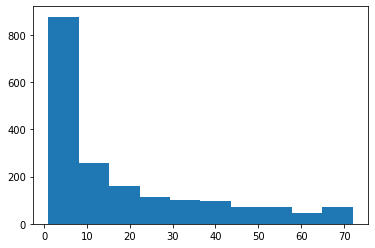

In [31]:
plt.hist(churn_df['tenure'])

(array([ 777.,  495.,  401.,  430.,  388.,  386.,  380.,  425.,  455.,
        1037.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 10 Patch objects>)

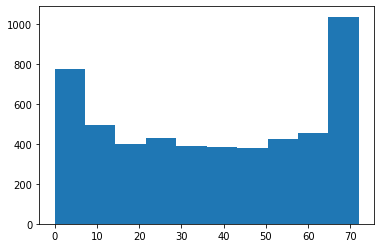

In [32]:
plt.hist(no_churn_df['tenure'])

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 10 Patch objects>)

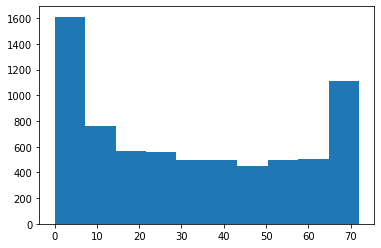

In [38]:
plt.hist(df['tenure'])

(array([150.,  55., 123., 151.,  51., 347., 356., 312., 276.,  48.]),
 array([ 18.85,  28.8 ,  38.75,  48.7 ,  58.65,  68.6 ,  78.55,  88.5 ,
         98.45, 108.4 , 118.35]),
 <a list of 10 Patch objects>)

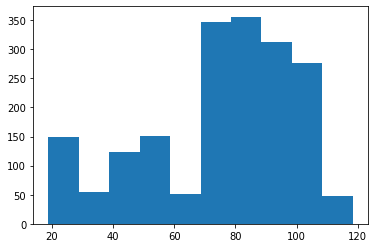

In [33]:
plt.hist(churn_df['MonthlyCharges'])

(array([1458.,  134.,  246.,  487.,  420.,  545.,  598.,  550.,  485.,
         251.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 10 Patch objects>)

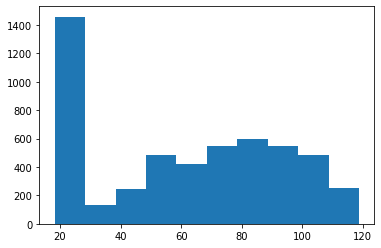

In [34]:
plt.hist(no_churn_df['MonthlyCharges'])

(array([1024.,  271.,  166.,  125.,   73.,   69.,   58.,   46.,   32.,
           5.]),
 array([  18.85 ,  885.445, 1752.04 , 2618.635, 3485.23 , 4351.825,
        5218.42 , 6085.015, 6951.61 , 7818.205, 8684.8  ]),
 <a list of 10 Patch objects>)

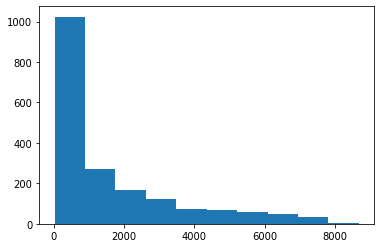

In [35]:
plt.hist(churn_df['TotalCharges'])

(array([1685.,  955.,  506.,  381.,  383.,  341.,  335.,  267.,  193.,
         117.]),
 array([  18.8  ,  884.165, 1749.53 , 2614.895, 3480.26 , 4345.625,
        5210.99 , 6076.355, 6941.72 , 7807.085, 8672.45 ]),
 <a list of 10 Patch objects>)

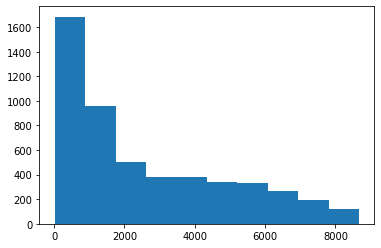

In [36]:
plt.hist(no_churn_df['TotalCharges'])

In [27]:
y_value = df['Churn'].value_counts()
y_value

No     5174
Yes    1869
Name: Churn, dtype: int64

In [77]:
def vis_compare(column):
#     y_value = df[column].value_counts()
#     y_val_churn = churn_df[column].value_counts()
#     y_val_no_churn = no_churn_df[column].value_counts()
    print('Key:')
    print('Churned + Not Churned, Churned, Not Churned')
    print(df[column].value_counts())
    fig, ax = plt.subplots(1, 3, figsize = (15,4))
    sns.countplot(df[column], ax=ax[0])
    sns.countplot(churn_df[column], ax=ax[1])
    sns.countplot(no_churn_df[column], ax=ax[2])

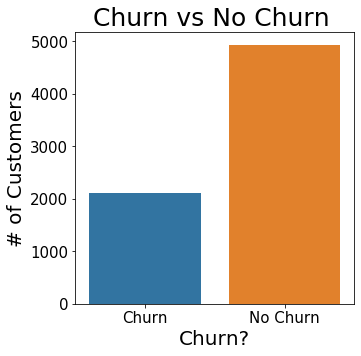

In [79]:
fig, ax = plt.subplots(figsize=(5,5))
plt.title('Churn vs No Churn ', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Churn?', fontsize = 20)
plt.ylabel('# of Customers', fontsize = 20)
sns.barplot(x = ['Churn', 'No Churn'], y = [y_value[1], y_value[0]], ax = ax)

Pretty imbalanced, I'll see if I can do something about that at some point. 

In [40]:
y_value = df['gender'].value_counts()
y_value

Male      3555
Female    3488
Name: gender, dtype: int64

Key:
Churned + Not Churned, Churned, Not Churned
Male      3555
Female    3488
Name: gender, dtype: int64


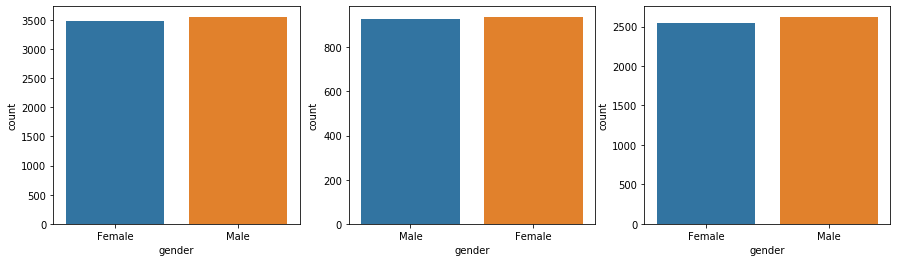

In [80]:
vis_compare('gender')

In [42]:
y_value = df['SeniorCitizen'].value_counts()
y_value

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Key:
Churned + Not Churned, Churned, Not Churned
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


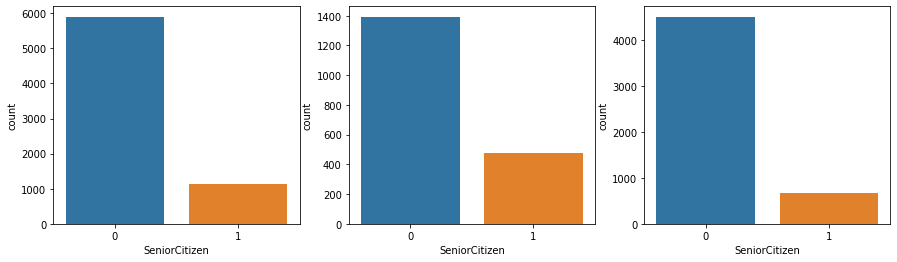

In [81]:
vis_compare('SeniorCitizen')

In [45]:
y_value = df['Partner'].value_counts()
y_value

No     3641
Yes    3402
Name: Partner, dtype: int64

Key:
Churned + Not Churned, Churned, Not Churned
No     3641
Yes    3402
Name: Partner, dtype: int64


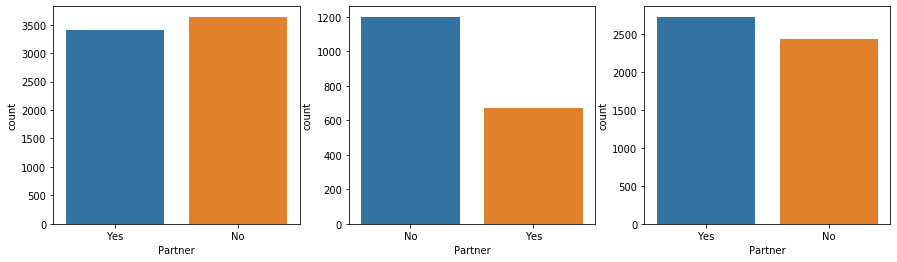

In [82]:
vis_compare('Partner')

In [47]:
# Dependents
y_value = df['Dependents'].value_counts()
y_value

No     4933
Yes    2110
Name: Dependents, dtype: int64

Key:
Churned + Not Churned, Churned, Not Churned
No     4933
Yes    2110
Name: Dependents, dtype: int64


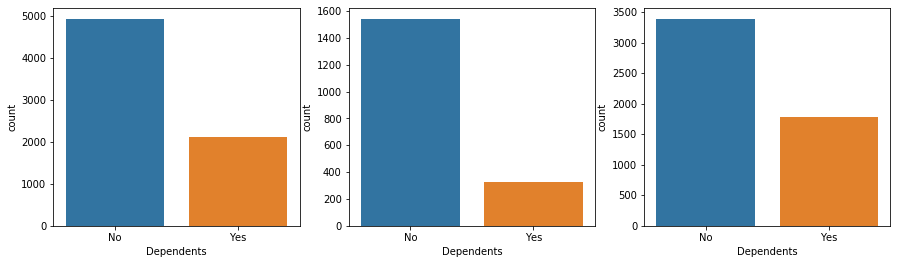

In [83]:
vis_compare('Dependents')

In [6]:
encode_df = df.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'],  axis = 1)

In [7]:
le = LabelEncoder()

In [8]:
encoded_df = encode_df.apply(le.fit_transform)

In [9]:
encoded_df[['tenure', 'MonthlyCharges', 'TotalCharges']] = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [10]:
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.50
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,2,53.85,108.15
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,2,70.70,151.65


In [12]:
X = encoded_df.drop(['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1)
y = encoded_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 7)

In [13]:
X_t, X_val, y_t, y_val = train_test_split(X_train,y_train, random_state=7, test_size = .15)

Data's ready, time for

## FSMs

The plan is to run a KNN, randomforest, and decision tree classifier w/o anything fancy for now.

Starting w/ KNN

In [14]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 2)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [20]:
knn_pred = knn.predict(X_test)
knn_acc = metrics.accuracy_score(y_val, knn_pred)

print("predictions: ", knn_pred)
print("accuracy: ", knn_acc)

ValueError: Found input variables with inconsistent numbers of samples: [846, 1409]

Not bad for an fsm, will ss the floats next time for all of these

Decision tree, making validation data as this guy will likely overfit

In [16]:
dt = DecisionTreeClassifier()
dt.fit(X_t, y_t)

dt_y_hat_val = dt.predict(X_val)
print(f'Training Score: {dt.score(X_t, y_t)}')
print(f'Val      Score: {dt.score(X_val, y_val)}')

Training Score: 0.9273182957393483
Val      Score: 0.710401891252955


Confusion Matrix, without normalization
[[509 121]
 [124  92]]


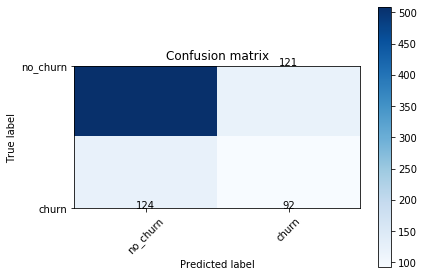

In [24]:
from src.confusion import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, accuracy_score, recall_score, precision_score
plot_confusion_matrix(confusion_matrix(y_val, dt_y_hat_val),classes=['no_churn', 'churn'])

Why are you so squished? If I can figure out whats wrong I'll fix this later, but its not important right now. 

Overfit, going for its couzin now

Random Forest

In [47]:
rf = RandomForestClassifier()
rf.fit(X_t, y_t)

y_hat_val = rf.predict(X_val)
print(f'Training Score: {rf.score(X_t, y_t)}')
print(f'Val      Score: {rf.score(X_val, y_val)}')

/Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Score: 0.9154135338345865
Val      Score: 0.7565011820330969


Next plan of attack is to try out some regularization and/or use standard scaler on the floats